<a href="https://colab.research.google.com/github/Isabellitankian/FIAP-2022/blob/main/Machine_Learning_Isabell%C3%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando Machine Learning para fazer a análise do Dataframe e utilizando R2 score para prever o modelo. ⚛

In [ ]:
import pandas as pd #pandas faz tudo e mais um pouco.
from matplotlib import pyplot as plt  #para construir e customizar gráficos.
import seaborn as sns #para visualizar uns gráficos.
import numpy as np #numpy porque é sempre bom importar numpy né. 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter

Ex 1: "Faça uma análise descritiva geral dos dados, para se familirizar com o dataset"
Iniciando a leitura do Dataset :)

In [ ]:
dados = pd.read_csv('https://tinyurl.com/42rvaw4p') #Definindo que o arquivo ficará com o nome "dados"
dados.head(20)

In [ ]:
dados.describe() #Para ver uma descrição mais detalhada 

In [ ]:
dados.info() #Para visualizar as as informações 

In [ ]:
dados.drop_duplicates(keep='first', inplace=True) #Remover a duplicidade dos dados.
dados.head(10)

EX 2: "Faça um histograma com as idades das pessoas."


<function matplotlib.pyplot.show>

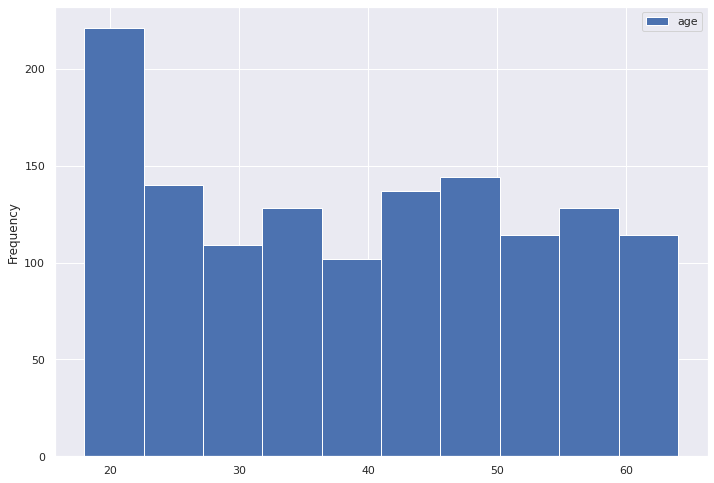

In [ ]:
dados['age'].plot.hist(legend=True, xlabel='Pessoas', ylabel='idade')

plt.show

In [ ]:
sns.pairplot(dados, hue="age") 

Ex 3: "Faça uma gráfico com a distribuição das pessoas por sexo."

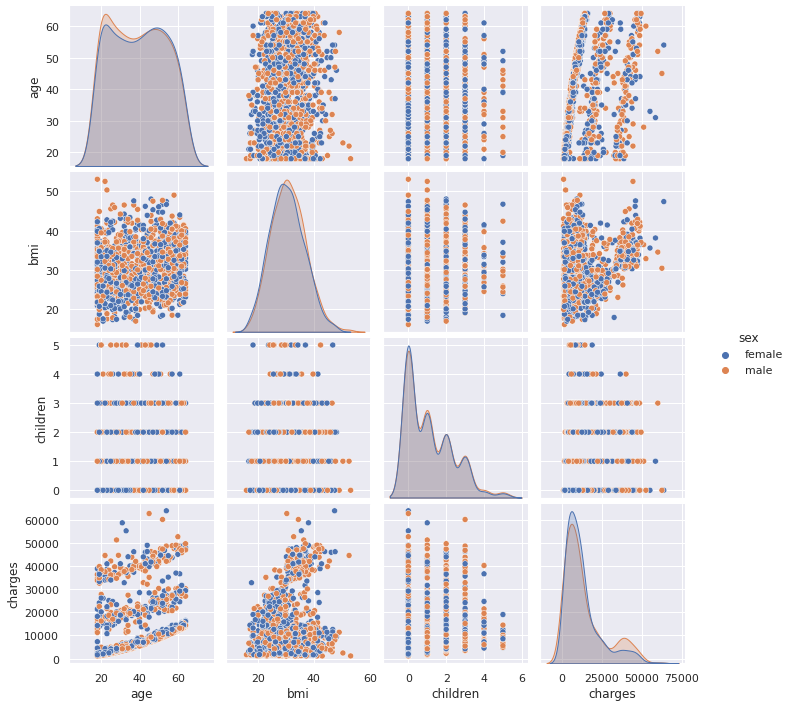

In [ ]:
sns.pairplot(dados, hue='sex')

Text(0.5, 1.0, 'Relação entre a idade das pessoas')

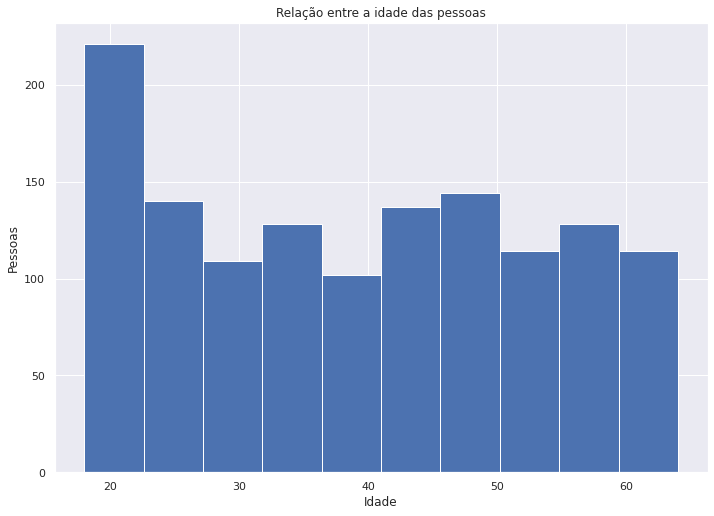

In [ ]:
#Relação entre idade e sexo

dados["age"].plot.hist()
plt.xlabel("Idade")
plt.ylabel("Pessoas")
plt.title("Relação entre a idade das pessoas")

Ex 4: "Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto"

[Text(0.5, 1.0, 'Gastos por região - southwest')]

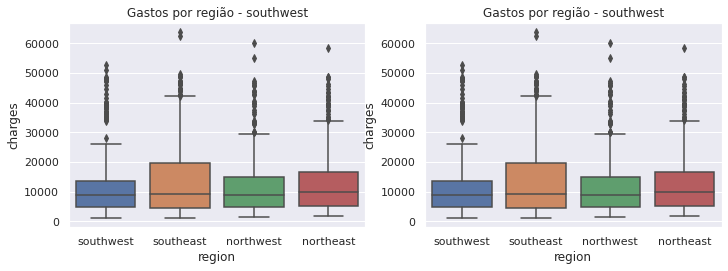

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(2,2,1)
sns.boxplot(x="region", y="charges",data=dados).set(title='Gastos por região - southwest')
plt.subplot(2,2,2)
sns.boxplot(x="region", y="charges",data=dados).set(title='Gastos por região - southwest')


Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"

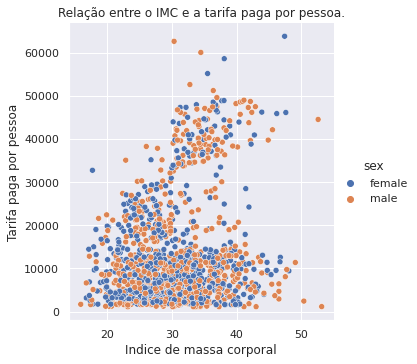

In [ ]:
ax = sns.relplot(x="bmi", y="charges", data=dados, hue='sex')
ax.set(title ="Relação entre o IMC e a tarifa paga por pessoa.", xlabel='Indice de massa corporal', ylabel='Tarifa paga por pessoa')

Ex 6: "Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro hue ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões?"


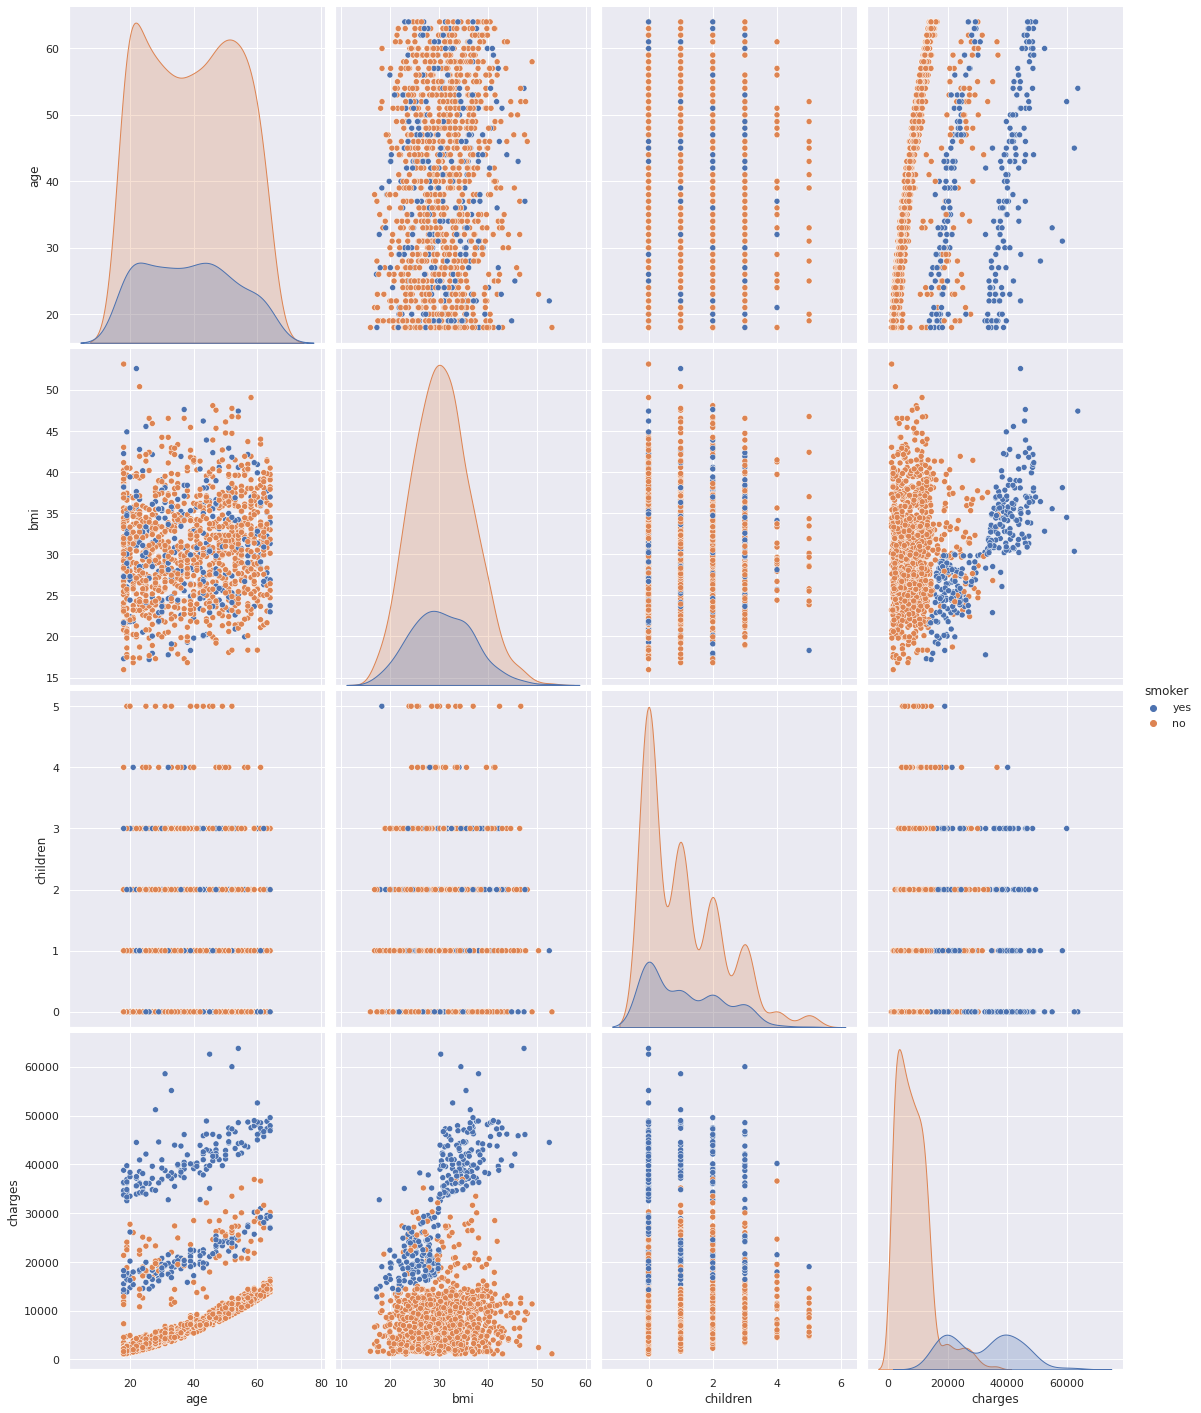

In [ ]:
sns.pairplot(dados, hue="smoker", height=5, aspect=0.8) 

Ex 7: Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc."

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df = pd.DataFrame(dados)
mean_df = df['charges'].mean()
print("Essa é a média dos valores pagos no seguro", mean_df)

x = df.loc[df['charges'] > mean_df]
#print(x)

#idade média 
mean_df = x['age'].mean()
#print(f"Essa é a média de idade", mean_df)

c=0
for (x) in df['age']:
  if x > mean_df:
    c = c + 1

print(f"A média é de idade é de {mean_df} E essa é a quantidade de pessoas acima da média: {c}")


Essa é a média dos valores pagos no seguro 13279.121486655948
A média é de idade é de 42.464285714285715 E essa é a quantidade de pessoas acima da média: 583


Ex 8: "Verifique quantas pessoas existem abaixo dos 30 anos e que são fumantes"

In [ ]:
#Pessoas abaixo dos 30 quantidade de pessoas abaixo dos 30 anos:", x, "pessoas.")

x = df.loc[df['age'] < 30]
z=x.loc[x['smoker'] =='yes'] 

print("A quantidade de pessoas abaixo dos 30 anos e fumantes são de:", z['smoker'].count(), "pessoas.")



A quantidade de pessoas abaixo dos 30 anos e fumantes são de: 86 pessoas.


Ex: 9 "Padronize as features do dataset"

In [ ]:
dadinhos = dados.copy()
print(dadinhos)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
dadinhos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


In [ ]:
dadinhos.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
def sex(x):
    if x == "male":
        return 0
    else:
        return 1

def smoker(x):
    if x == "yes":
        return 1
    else:
        return 0
    
def region(x):
    if x == "southwest":
        return 0
    elif x == "southeast":
        return 1
    elif x == "northwest":
        return 2
    else:
        return 3

dadinhos["sex"] = dadinhos["sex"].apply(sex)
dadinhos["smoker"] = dadinhos["smoker"].apply(smoker)
dadinhos["region"] = dadinhos["region"].apply(region)

In [ ]:
dadinhos.shape

(1337, 7)

In [ ]:
dadinhos.drop_duplicates(inplace=True)

In [ ]:
dadinhos.dropna(inplace=True)

In [ ]:
dadinhos.shape
print(dadinhos)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       0  16884.92400
1      18    0  33.770         1       0       1   1725.55230
2      28    0  33.000         3       0       1   4449.46200
3      33    0  22.705         0       0       2  21984.47061
4      32    0  28.880         0       0       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       2  10600.54830
1334   18    1  31.920         0       0       3   2205.98080
1335   18    1  36.850         0       0       1   1629.83350
1336   21    1  25.800         0       0       0   2007.94500
1337   61    1  29.070         0       1       2  29141.36030

[1337 rows x 7 columns]


Ex 10: "Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o R2 score e interprete o valor desta métrica"

In [ ]:
X = dados.drop(columns=['charges'])
Y = dados["bmi"]

In [ ]:
X.describe()

In [ ]:
#Normalização
escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)

In [ ]:
#Dividir em conjuntos de treinamento e teste
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

In [ ]:
#Executando uma Regressão Linear simples
reglinear = SGDRegressor(max_iter=3000,
                         tol=0.000001,
                         eta0=0.1,
                         learning_rate='constant',               #taxa constante 
                   verbose=2, 
)

In [ ]:
reglinear.fit(X_norm_train, Y_train)

In [ ]:
Y_r1_previsao = reglinear.predict(X_norm_test)

In [ ]:
r2_r1 = r2_score(Y_test, Y_r1_previsao)

In [ ]:
print("R2 RL:", r2_r1)